In [1303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, davies_bouldin_score
from kneed import KneeLocator

## Data Collecting

In [1304]:
from google.colab import files
uploaded = files.upload()

Saving life_expectancy.csv to life_expectancy (36).csv


## Exploratory Data Anlysis (EDA)

In [1305]:
df = pd.read_csv('life_expectancy.csv')

In [1306]:
df.head()

,Country,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy
0,Chad,57.19,55.24,53.36
1,Nigeria,54.94,54.64,54.33
2,South Sudan,60.75,57.74,54.76
3,Lesotho,60.44,57.80,55.03
4,Central African Republic,59.56,57.67,55.51


In [1307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               200 non-null    object 
 1   Sum of Females  Life Expectancy       200 non-null    float64
 2   Sum of Life Expectancy  (both sexes)  200 non-null    float64
 3   Sum of Males  Life Expectancy         200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


Berdasarkan informasi diatas, data terdiri dari 1 kolom kategori (Country) dan 3 kolom numerik, tidak ada data yang hilang

In [1308]:
df.isnull().sum()

,0
Country,0
Sum of Females Life Expectancy,0
Sum of Life Expectancy (both sexes),0
Sum of Males Life Expectancy,0


cek missing values dan tidak ada yang missing atau kosong

In [1309]:
df.describe()

,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy
count,200.000000,200.000000,200.000000
mean,76.776900,74.133700,71.517200
std,8.820332,8.571318,8.419633
min,54.940000,54.640000,53.360000
25%,71.300000,68.732500,66.270000
50%,77.955000,74.700000,71.250000
75%,81.985000,79.062500,76.565000
max,149.220000,143.280000,137.640000


- terdapat 200 entri untuk setiap kolom
- rata rata umur wanita lebih besar dari pria yang berarti wanita mempunyai harapan hidup lebih tinggi dari pria
- std deviasi menunjukkan variasi yang cukup signifikan
- median cukup dekat dengan mean yang berarti ga terlalu skewed secara ekstrim
- nilai maksimum cukup tinggi, hampir 2 kali dari q3 yang berarti ada indikasi outlier. (perlu di analisis lebih lanjut)

In [1310]:
max_female_le = df["Sum of Females  Life Expectancy"].max()
max_male_le = df["Sum of Males  Life Expectancy"].max()
max_both_le = df["Sum of Life Expectancy  (both sexes)"].max()

print("Data dengan harapan hidup perempuan tertinggi:")
print(df[df["Sum of Females  Life Expectancy"] == max_female_le])

print("\nData dengan harapan hidup laki-laki tertinggi:")
print(df[df["Sum of Males  Life Expectancy"] == max_male_le])

print("\nData dengan harapan hidup keseluruhan tertinggi:")
print(df[df["Sum of Life Expectancy  (both sexes)"] == max_both_le])


Data dengan harapan hidup perempuan tertinggi:
        Country  Sum of Females  Life Expectancy  \
199  Micronesia                           149.22   

     Sum of Life Expectancy  (both sexes)  Sum of Males  Life Expectancy  
199                                143.28                         137.64  

Data dengan harapan hidup laki-laki tertinggi:
        Country  Sum of Females  Life Expectancy  \
199  Micronesia                           149.22   

     Sum of Life Expectancy  (both sexes)  Sum of Males  Life Expectancy  
199                                143.28                         137.64  

Data dengan harapan hidup keseluruhan tertinggi:
        Country  Sum of Females  Life Expectancy  \
199  Micronesia                           149.22   

     Sum of Life Expectancy  (both sexes)  Sum of Males  Life Expectancy  
199                                143.28                         137.64  


Terlihat bahwa 'Micronesia' memiliki nilai yang sangat jauh berbeda.


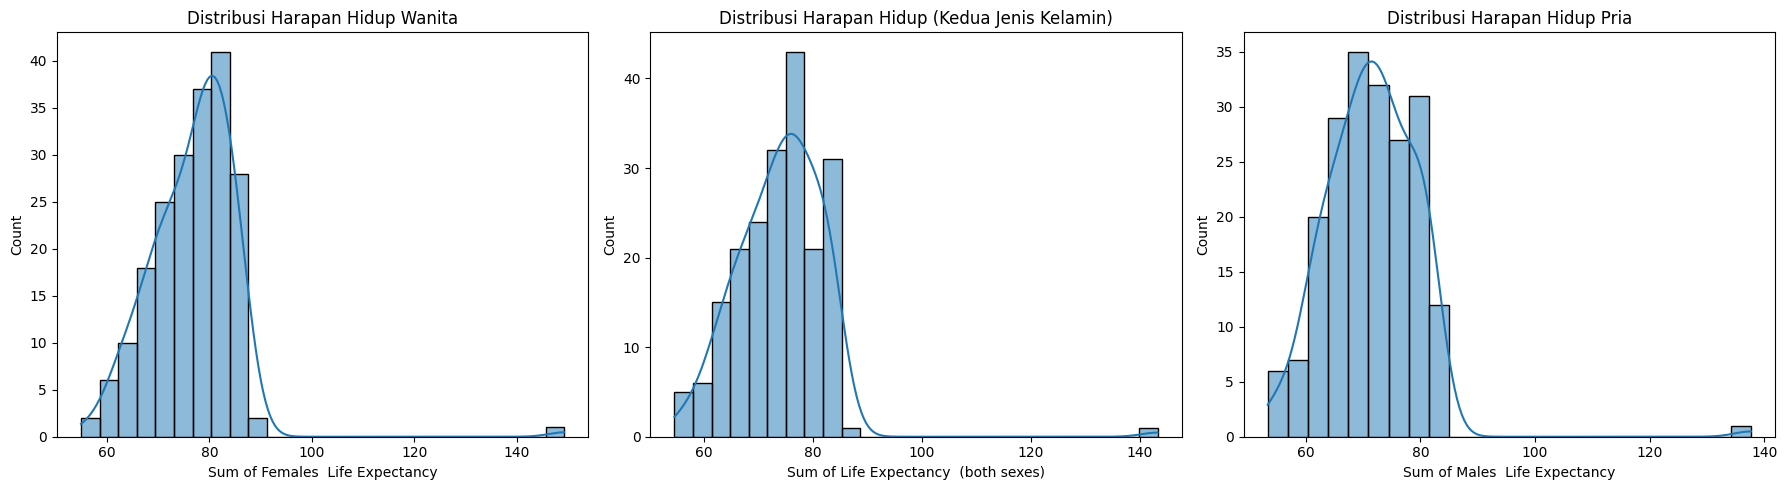

In [1311]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Sum of Females  Life Expectancy'], kde=True)
plt.title('Distribusi Harapan Hidup Wanita')

plt.subplot(1, 3, 2)
sns.histplot(df['Sum of Life Expectancy  (both sexes)'], kde=True)
plt.title('Distribusi Harapan Hidup (Kedua Jenis Kelamin)')

plt.subplot(1, 3, 3)
sns.histplot(df['Sum of Males  Life Expectancy'], kde=True)
plt.title('Distribusi Harapan Hidup Pria')

plt.tight_layout()
plt.show()

- Ketiga histogram menunjukkan distribusi yang tidak simetris (asymmetric).
- Distribusi terlihat miring ke kiri (left-skewed atau negatively skewed).
- ada outlier di setiap kolom (wanita > 140, keduanya > 140, pria > 120)

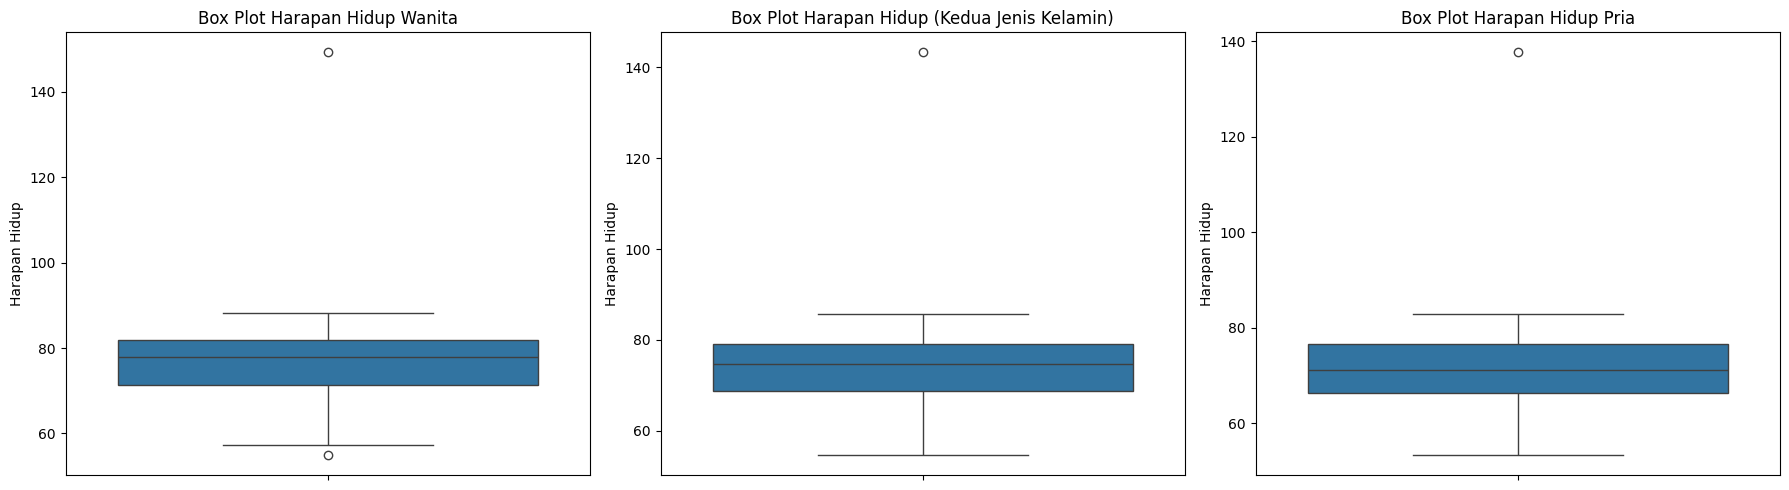

In [1312]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Sum of Females  Life Expectancy'])
plt.title('Box Plot Harapan Hidup Wanita')
plt.ylabel('Harapan Hidup')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Sum of Life Expectancy  (both sexes)'])
plt.title('Box Plot Harapan Hidup (Kedua Jenis Kelamin)')
plt.ylabel('Harapan Hidup')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Sum of Males  Life Expectancy'])
plt.title('Box Plot Harapan Hidup Pria')
plt.ylabel('Harapan Hidup')

plt.tight_layout()
plt.show()

berdasarkan data boxplot diatas, ternyata kolom sum of females le mempunyai 2 outlier, satunya berada dibawah, ini perlu di analisis lebih lanjut

In [1313]:
min_female_le = df["Sum of Females  Life Expectancy"].min()
print("Data dengan harapan hidup perempuan terendah:")
print(df[df["Sum of Females  Life Expectancy"] == min_female_le])

Data dengan harapan hidup perempuan terendah:
   Country  Sum of Females  Life Expectancy  \
1  Nigeria                            54.94   

   Sum of Life Expectancy  (both sexes)  Sum of Males  Life Expectancy  
1                                 54.64                          54.33  


negara dengan nilai min di kolom female le adalah nigeria yang berarti outlier

In [1314]:
numerik = df.select_dtypes(include=['float64']).columns
Q1 = df[numerik].quantile(0.25)
Q3 = df[numerik].quantile(0.75)
IQR = Q3 - Q1
scan = ((df[numerik] < (Q1 - 1.5 * IQR)) | (df[numerik] > (Q3 + 1.5 * IQR))).any(axis=1)
outliers = df[scan]
outliers

,Country,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy
1,Nigeria,54.94,54.64,54.33
199,Micronesia,149.22,143.28,137.64


Berdasarkan metode IQR (dengan standar 1.5 kali IQR), hanya dua negara dalam dataset ini yang teridentifikasi memiliki setidaknya satu nilai harapan hidup yang dianggap outlier: Nigeria dan Micronesia.

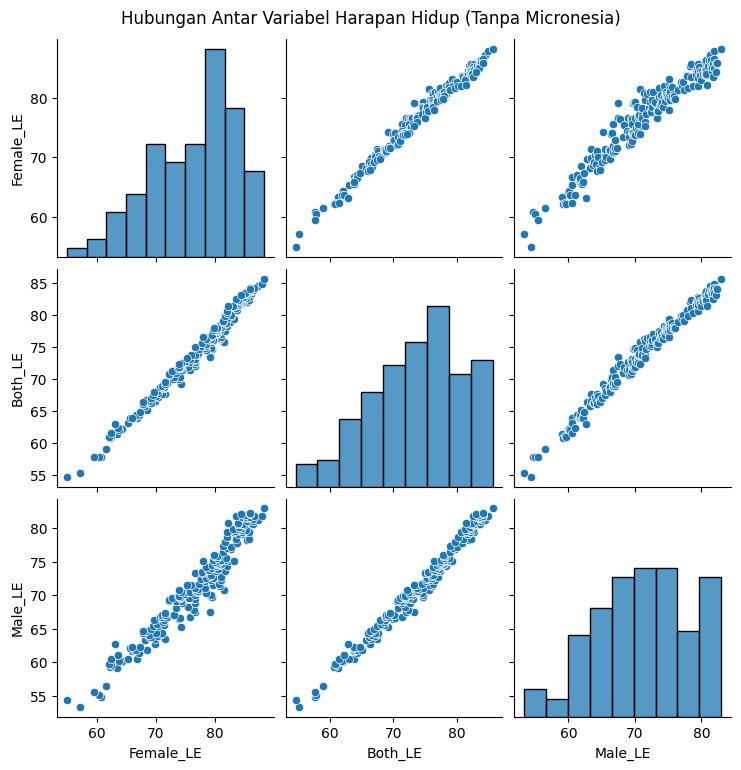

In [1315]:
le = df.rename(columns={
    "Sum of Females  Life Expectancy": "Female_LE",
    "Sum of Life Expectancy  (both sexes)": "Both_LE",
    "Sum of Males  Life Expectancy": "Male_LE"
})
tanpa_outlier = le[le['Country'] != 'Micronesia']
sns.pairplot(tanpa_outlier)
plt.suptitle('Hubungan Antar Variabel Harapan Hidup (Tanpa Micronesia)', y=1.02)
plt.show()

- menunjukkan adanya korelasi linear positif yang kuat antara ketiga variabel harapan hidup
- negara dengan harapan hidup wanita tinggi cenderung memiliki harapan hidup pria dan keseluruhan yang tinggi juga
- harapan hidup tinggi pada satu jenis kelamin/kelompok cenderung berkorelasi dengan harapan hidup tinggi pada kelompok lainnya.

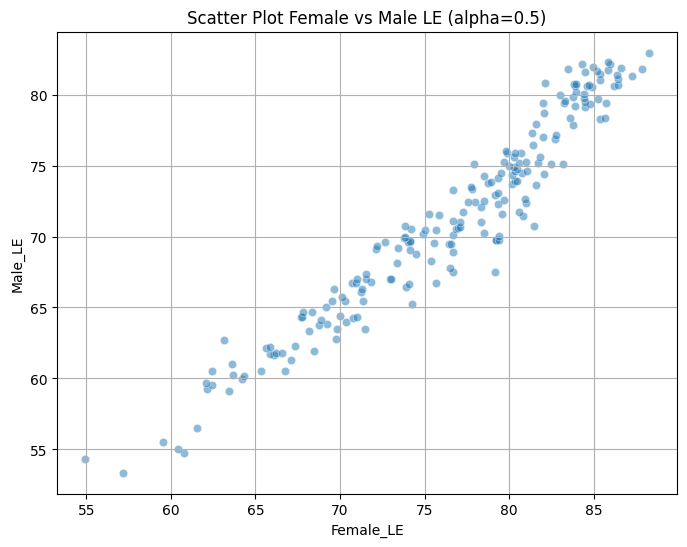

In [1316]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tanpa_outlier, x='Female_LE', y='Male_LE', alpha=0.5)
plt.title('Scatter Plot Female vs Male LE (alpha=0.5)')
plt.grid(True)
plt.show()

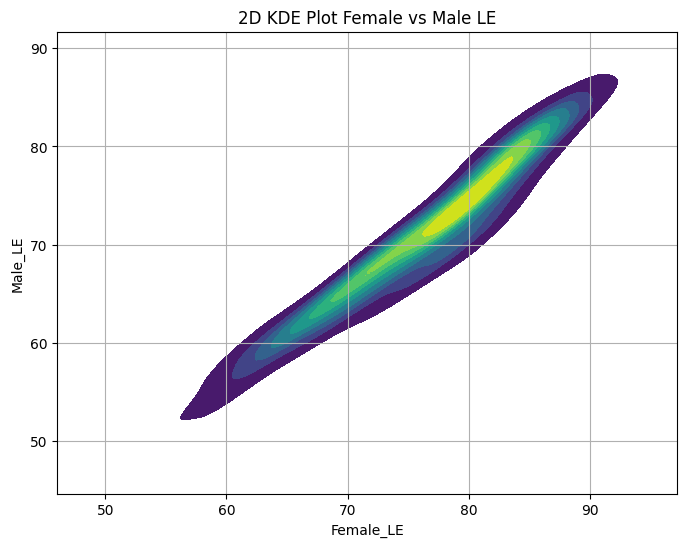

In [1317]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=tanpa_outlier, x='Female_LE', y='Male_LE', fill=True, cmap="viridis", levels=10)
plt.title('2D KDE Plot Female vs Male LE')
plt.grid(True)
plt.show()

Berdasarkan pair plot alpha dan 2D KDE plot, meskipun ada variasi kepadatan yang terlihat (lebih padat di tengah), tidak tampak adanya kelompok (cluster) yang jelas terpisah satu sama lain oleh area dengan kepadatan rendah.

## Data Preprocessing

In [1318]:
X = df[numerik]

In [1319]:
print(f"\nJumlah data sebelum menghapus outlier: {len(df)}")
df_processed = df[df['Country'] != 'Micronesia'].copy()
X_processed = df_processed[numerik]
print(f"Jumlah data setelah menghapus outlier 'Micronesia': {len(df_processed)}")


Jumlah data sebelum menghapus outlier: 200
Jumlah data setelah menghapus outlier 'Micronesia': 199


 Nilai harapan hidup Micronesia (140-150) sangat tidak realistis untuk rata-rata nasional. Nilai harapan hidup Nigeria (55) sangat rendah, tetapi sayangnya masih dalam batas kemungkinan untuk negara yang menghadapi tantangan signifikan. jadi untuk yang nigeria tidak perlu dihapus hanya micronesia

Penskalaan Fitur (Feature Scaling)

DBSCAN menggunakan jarak, jadi penskalaan penting agar fitur dengan rentang
nilai besar tidak mendominasi perhitungan jarak. StandardScaler digunakan.

In [1320]:
print("\nPenskalaan fitur menggunakan StandardScaler")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)


Penskalaan fitur menggunakan StandardScaler


Mengubah kembali ke DataFrame biar mudah

In [1321]:
X_scaled_df = pd.DataFrame(X_scaled, columns=numerik, index=df_processed.index)

In [1322]:
print("Data setelah penskalaan (head):")
print(X_scaled_df.head())

Data setelah penskalaan (head):
   Sum of Females  Life Expectancy  Sum of Life Expectancy  (both sexes)  \
0                        -2.684018                             -2.640837   
1                        -2.998177                             -2.726272   
2                        -2.186948                             -2.284857   
3                        -2.230232                             -2.276313   
4                        -2.353103                             -2.294824   

   Sum of Males  Life Expectancy  
0                      -2.551400  
1                      -2.412557  
2                      -2.351009  
3                      -2.312362  
4                      -2.243656  


## Model Training

In [1323]:
min_samples = 5
print(f"\nMenggunakan min_samples = {min_samples}")


Menggunakan min_samples = 5


Menentukan Parameter DBSCAN: `eps` dan `min_samples`
Pilihan umum adalah D+1 hingga 2*D, di mana D adalah jumlah dimensi (fitur).

In [1324]:
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

Metode umum: k-distance graph (elbow method).

Hitung jarak ke tetangga ke-(min_samples - 1) terdekat untuk setiap titik.

In [1325]:
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

In [1326]:
knee_locator = KneeLocator(range(len(sorted_distances)), sorted_distances, curve='convex', direction='increasing')
chosen_eps = sorted_distances[knee_locator.elbow]

knee locator untuk menentukan titik elbow, kemudian dihitung jarak dari titik elbow, lalu didapatkan eps yang optimal

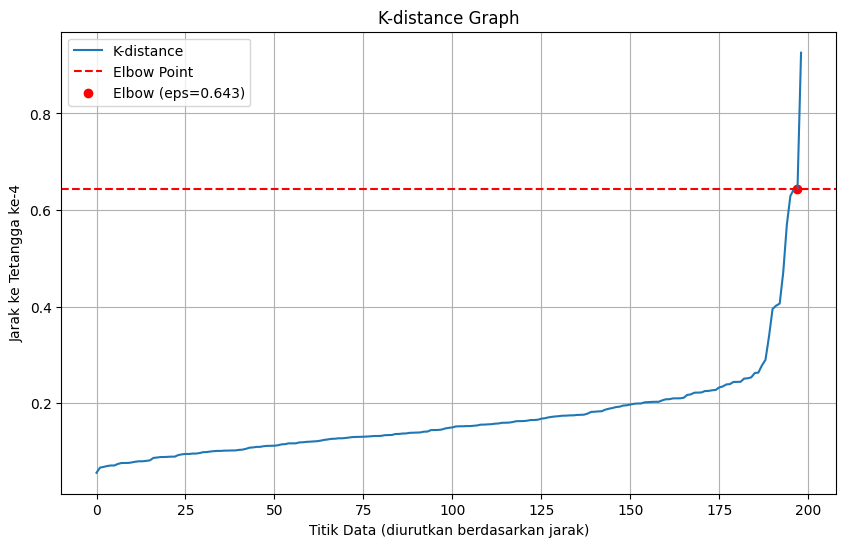

In [1327]:
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances, label="K-distance")
plt.axhline(y=chosen_eps, color='r', linestyle='--', label="Elbow Point")
plt.scatter(knee_locator.elbow, chosen_eps, color='red', label=f"Elbow (eps={chosen_eps:.3f})")

plt.xlabel("Titik Data (diurutkan berdasarkan jarak)")
plt.ylabel(f"Jarak ke Tetangga ke-{min_samples-1}")
plt.title("K-distance Graph")
plt.legend()
plt.grid(True)
plt.show()

dari grafik diatas, didapatkan eps = 0.643 jika min sampelnya = 5

In [1328]:
manual_eps = 0.643

disini untuk inputan eps nya saya manual saya melakukan banyak percobaan dengan eps yang berbeda

In [1329]:
dbscan = DBSCAN(eps=manual_eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X_scaled)

membuat dan melatih model DBSCAN

In [1330]:
df_processed['Cluster_DBSCAN'] = clusters

kasih label cluster ke df yg sudah di proses

## Model Evaluation

In [1331]:
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f"Estimasi jumlah cluster: {n_clusters_}")
print(f"Estimasi jumlah noise points: {n_noise_}")

Estimasi jumlah cluster: 1
Estimasi jumlah noise points: 1


dengan min sample = 5 dan eps = 0.643 didapatkan satu cluster 1 noise

Jumlah cluster yang ditemukan dan jumlah noise points (-1)

Tampilkan sebaran ukuran cluster

In [1332]:
print(df_processed['Cluster_DBSCAN'].value_counts())

Cluster_DBSCAN
 0    198
-1      1
Name: count, dtype: int64


Hitung rata-rata fitur untuk setiap cluster

In [1333]:
cluster_means = df_processed.groupby('Cluster_DBSCAN')[numerik].mean()
print(cluster_means)

                Sum of Females  Life Expectancy  \
Cluster_DBSCAN                                    
-1                                    54.940000   
 0                                    76.521313   

                Sum of Life Expectancy  (both sexes)  \
Cluster_DBSCAN                                         
-1                                         54.640000   
 0                                         73.882929   

                Sum of Males  Life Expectancy  
Cluster_DBSCAN                                 
-1                                  54.330000  
 0                                  71.270051  


Periksa beberapa anggota dari setiap cluster dan noise

In [1334]:
print("\nContoh Anggota per Cluster:")
for cluster_id in sorted(df_processed['Cluster_DBSCAN'].unique()):
    print(f"\nCluster {cluster_id}:")
    # Ambil maksimal 5 contoh negara dari cluster ini
    print(df_processed[df_processed['Cluster_DBSCAN'] == cluster_id]['Country'].head().tolist())


Contoh Anggota per Cluster:

Cluster -1:
['Nigeria']

Cluster 0:
['Chad', 'South Sudan', 'Lesotho', 'Central African Republic', 'Somalia']


Visualisasi Hasil Clustering

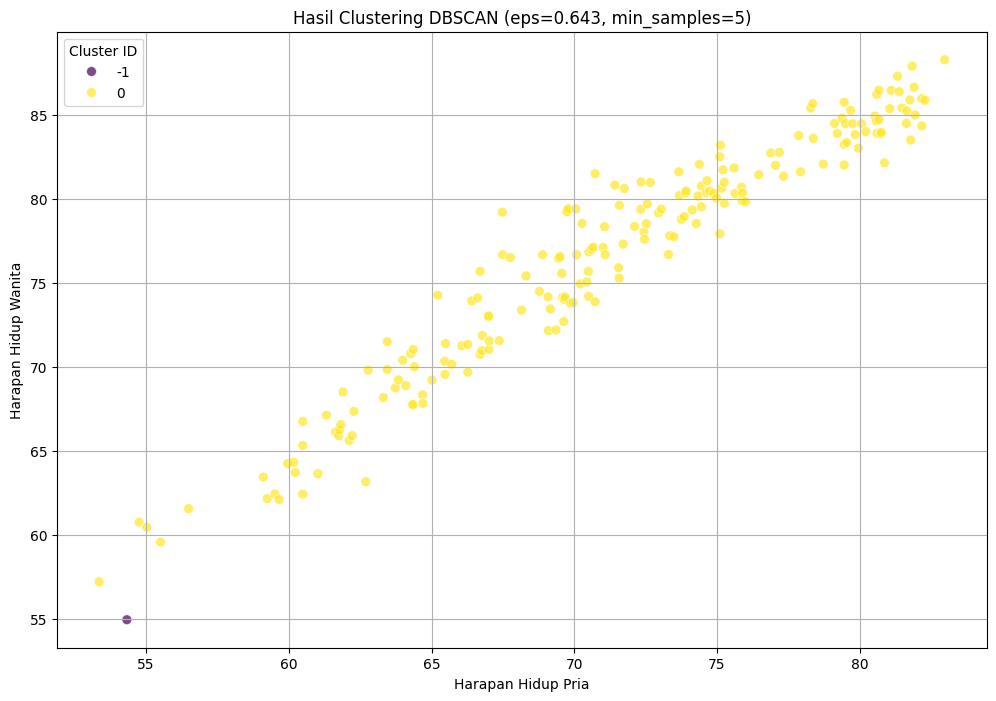

In [1335]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_processed, x='Sum of Males  Life Expectancy', y='Sum of Females  Life Expectancy',
                hue='Cluster_DBSCAN', palette='viridis', s=50, alpha=0.7)
plt.title(f'Hasil Clustering DBSCAN (eps={manual_eps:.3f}, min_samples={min_samples})')
plt.xlabel('Harapan Hidup Pria')
plt.ylabel('Harapan Hidup Wanita')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

Visualisasi Pair Plot dengan Warna Cluster

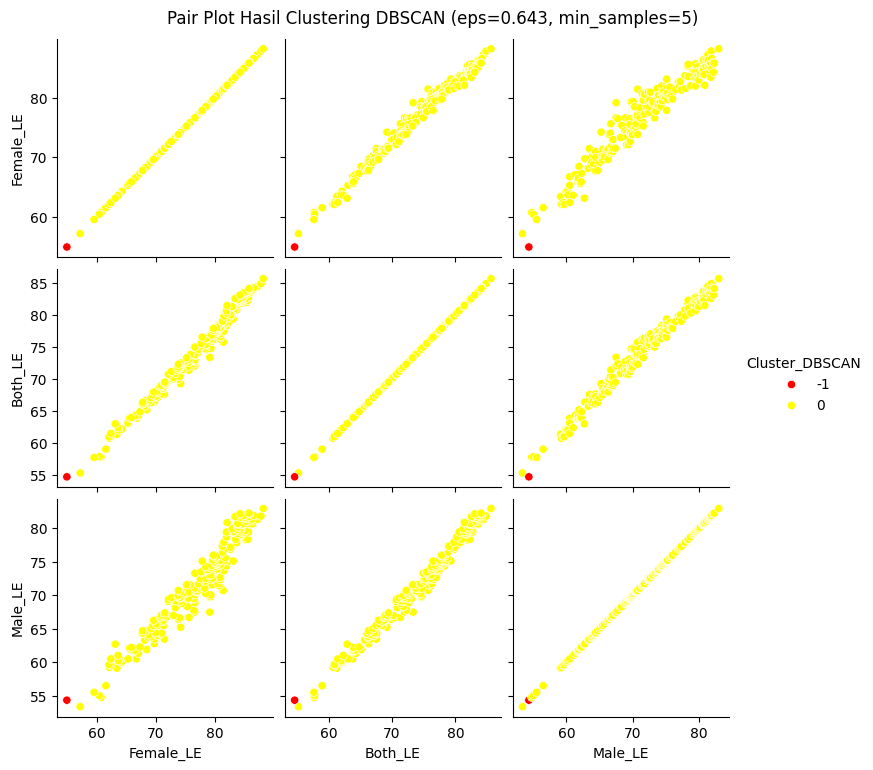

In [1336]:
new_viz_df = df_processed.rename(columns={
    "Sum of Females  Life Expectancy": "Female_LE",
    "Sum of Life Expectancy  (both sexes)": "Both_LE",
    "Sum of Males  Life Expectancy": "Male_LE"
})

numerik = new_viz_df.select_dtypes(include=['float64']).columns

unique_labels = sorted(new_viz_df['Cluster_DBSCAN'].unique())
palette_dict = {label: (1.0, 1.0, 0.0) if label != -1 else (1.0, 0.0, 0.0) for label in unique_labels}

sns.pairplot(new_viz_df, vars=numerik, hue='Cluster_DBSCAN', palette=palette_dict, diag_kind=None)
plt.suptitle(f'Pair Plot Hasil Clustering DBSCAN (eps={manual_eps:.3f}, min_samples={min_samples})', y=1.02)
plt.show()

In [1337]:
sil_score = silhouette_score(X_scaled, clusters)
db_score = davies_bouldin_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")


Silhouette Score: 0.496
Davies-Bouldin Index: 0.302


Saat melakukan banyak percobaan dengan min sample dan eps yang berbeda, terdapat 2 percobaan yang mempunyai hasil yang paling optimal diantara lainnya yaitu

Percobaan 1

- min_sample = 5, eps = 0.643
- hasilnya = 1 cluster dan 1 noise
- evaluasi = Silhouette (0.496), Davies Bouldin (0.302)

Percobaan 2
- min_sample = 5, eps = 0.5
- hasilnya = 1 cluster dan 2 noise
- evaluasi = Silhouette (0.503), Davies Bouldin (0.341)

Silhouette score dan Davies-Bouldin index umumnya lebih bermakna jika ada lebih dari satu cluster. Jika kedua opsi menghasilkan hanya satu cluster, maka kedua metrik evaluasi tersebut tidak akan memberikan gambaran yang akurat tentang kinerja clustering. Mengacu pada pair plot alpha dan 2D KDE, Kedua visualisasi ini tidak menunjukkan adanya kelompok data yang terpisah secara visual. Mereka menunjukkan satu struktur data utama yang kontinu dan berkorelasi tinggi.

data tersebut memang tidak memiliki struktur multi-cluster yang jelas pada tingkat kepadatan yang diuji. Jadi, ya, kemungkinan besar struktur dataset adalah alasan utama mengapa saya mendapatkan 1 cluster. Sesuai dengan kedua visualisasi sebelumnya di EDA.

Metrik Evaluasi

Interpretasi Silhouette Score:
    # > Mendekati +1: Cluster padat dan terpisah dengan baik.
    # > Mendekati 0: Cluster tumpang tindih atau titik dekat batas keputusan.
    # > Mendekati -1: Titik mungkin salah diklasifikasikan.
Intrepretasi Davies Bouldin index:
    # > Mendekati 0 → Clustering bagus (Cluster lebih terpisah dan padat).
    # > Nilai lebih besar → Clustering buruk (Cluster lebih tumpang tindih atau menyebar).

